In [1]:

import numpy as np

import pprint

import tensorflow as tf

from tk.data_generators import function_docstring

from tensorflow.contrib.eager.python import tfe
tfe.enable_eager_execution()
Modes = tf.estimator.ModeKeys


### Inspecting loss

In [33]:

a = tf.convert_to_tensor(np.array([[1.0,1.0,2.0],[1.0,2.0,1.0],[2.0,1.0,1.0]]))
b = tf.convert_to_tensor(np.array([[1.0,1.0,2.0],[1.0,2.0,1.0],[2.0,1.0,1.0]]))


In [34]:

def _cosine_similarity(a, b):
  """Computes the cosine similarity between two tensors."""

  with tf.name_scope("cosine_similarity"):

    a = tf.nn.l2_normalize(a, 1)
    b = tf.nn.l2_normalize(b, 1)
    return tf.matmul(a, tf.transpose(b)) 


In [35]:
cosine_similarity = _cosine_similarity(a, b)
print(cosine_similarity)
cosine_similarity_flat = tf.reshape(cosine_similarity, [-1, 1])
scale_factor=1
cosine_similarity_flat = scale_factor * cosine_similarity_flat

tf.Tensor(
[[1.         0.83333333 0.83333333]
 [0.83333333 1.         0.83333333]
 [0.83333333 0.83333333 1.        ]], shape=(3, 3), dtype=float64)


In [46]:

# Positive samples on the diagonal, reshaped as row-major.
label_matrix = tf.eye(tf.shape(cosine_similarity)[0], dtype=tf.float64)
pprint.pprint(label_matrix)
label_matrix_flat = tf.reshape(label_matrix, [-1, 1])


<tf.Tensor: id=435, shape=(3, 3), dtype=float64, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])>


In [48]:

tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        labels=label_matrix_flat, logits=cosine_similarity_flat))


<tf.Tensor: id=461, shape=(), dtype=float64, numpy=0.9005659953510988>

### Training

In [5]:

from tk.experiment import configure_experiment, T2TExperiment


In [53]:

args = configure_experiment("cs-lv3-kfnet",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "kfnet"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=kfnet'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kfnet/cs-lv3-kfnet-j1015-0057-2ad3/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kfnet/cs-lv3-kfnet-j1015-0057-2ad3/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


INFO:tensorflow:Identifying event files in experiment subdirectories...


[2018-10-15 01:09:17,783] Identifying event files in experiment subdirectories...


INFO:tensorflow:Processing experiment events (1 of 2)


[2018-10-15 01:09:18,822] Processing experiment events (1 of 2)


INFO:tensorflow:Processing experiment events (2 of 2)


[2018-10-15 01:09:19,441] Processing experiment events (2 of 2)


INFO:tensorflow:Finished loading event data for comparison.


[2018-10-15 01:09:20,129] Finished loading event data for comparison.


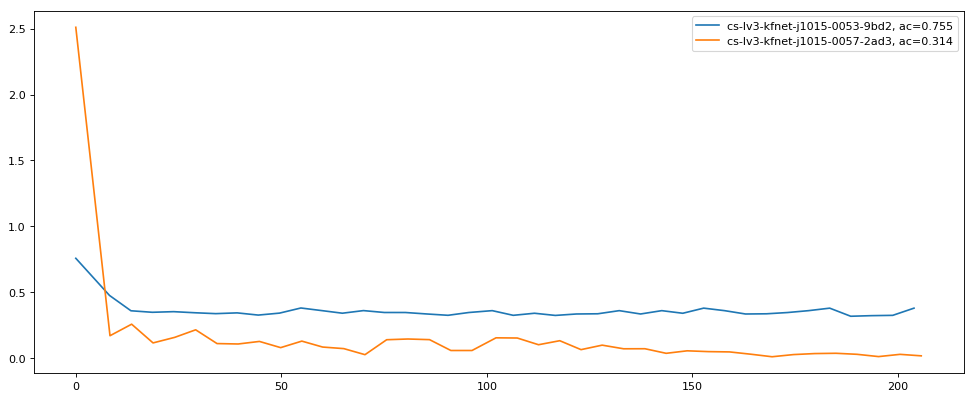

In [4]:

experiment_data = event_data_for_comparison("gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kfnet*")
show_experiment_loss(experiment_data)

# The latter being with a scale factor of 20,
# the former being the original


In [7]:

args = configure_experiment("cs-lv3-kfnet-sf5",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "kfnet"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


[2018-10-15 01:10:48,757] /mnt/nfs-east1-d/work/tk
[2018-10-15 01:10:48,764] /mnt/nfs-east1-d/work/tk


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=kfnet'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kfnet-sf5/cs-lv3-kfnet-sf5-j1015-0110-f169/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kfnet-sf5/cs-lv3-kfnet-sf5-j1015-0110-f169/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


[2018-10-15 01:10:56,622] smoke: True


In [54]:

args = configure_experiment("cs-lv3-simplecd-k1k",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "simple_cd"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=simple_cd'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k1k/cs-lv3-simplecd-k1k-j1015-0059-d1b7/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k1k/cs-lv3-simplecd-k1k-j1015-0059-d1b7/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


In [55]:


args = configure_experiment("cs-lv3-simplecd-k2k",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "simple_cd"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=simple_cd'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k2k/cs-lv3-simplecd-k2k-j1015-0103-8038/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k2k/cs-lv3-simplecd-k2k-j1015-0103-8038/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


In [5]:

args = configure_experiment("cs-lv3-simplecd-k250",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "simple_cd"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


[2018-10-15 01:07:30,567] /mnt/nfs-east1-d/work/tk
[2018-10-15 01:07:30,573] /mnt/nfs-east1-d/work/tk


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=simple_cd'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k250/cs-lv3-simplecd-k250-j1015-0107-0353/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k250/cs-lv3-simplecd-k250-j1015-0107-0353/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


[2018-10-15 01:07:38,493] smoke: True


In [1]:

from tk.allen_demo import event_data_for_comparison, show_experiment_loss
%matplotlib inline


INFO:tensorflow:Identifying event files in experiment subdirectories...


[2018-10-15 01:08:22,050] Identifying event files in experiment subdirectories...


INFO:tensorflow:Processing experiment events (1 of 1)


[2018-10-15 01:08:23,136] Processing experiment events (1 of 1)


INFO:tensorflow:Finished loading event data for comparison.


[2018-10-15 01:08:23,469] Finished loading event data for comparison.


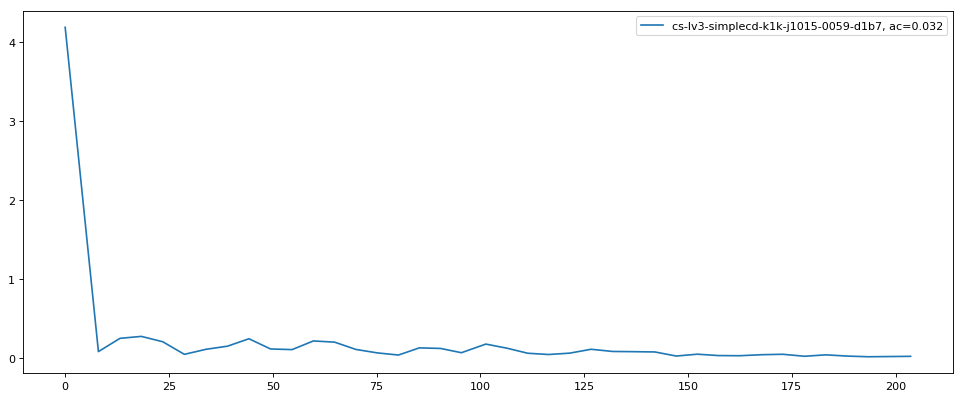

In [2]:

experiment_data = event_data_for_comparison("gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k1k*")
show_experiment_loss(experiment_data)


INFO:tensorflow:Identifying event files in experiment subdirectories...


[2018-10-15 01:17:03,979] Identifying event files in experiment subdirectories...


INFO:tensorflow:Processing experiment events (1 of 1)


[2018-10-15 01:17:05,046] Processing experiment events (1 of 1)


INFO:tensorflow:Finished loading event data for comparison.


[2018-10-15 01:17:05,377] Finished loading event data for comparison.


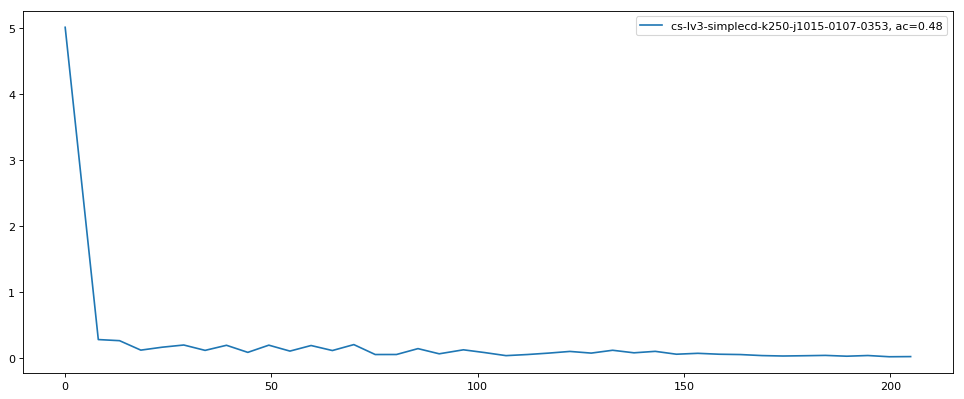

In [12]:
experiment_data = event_data_for_comparison("gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-k250*")
show_experiment_loss(experiment_data)

In [17]:
import tensorflow as tf
import numpy as np

a = tf.convert_to_tensor(np.array([[1.0,1.0,2.0],[1.0,2.0,1.0],[2.0,1.0,1.0]]))

print(a)
print(tf.diag_part(a))
print(a-tf.diag_part(a))

tf.Tensor(
[[1. 1. 2.]
 [1. 2. 1.]
 [2. 1. 1.]], shape=(3, 3), dtype=float64)
tf.Tensor([1. 2. 1.], shape=(3,), dtype=float64)
tf.Tensor(
[[ 0. -1.  1.]
 [ 0.  0.  0.]
 [ 1. -1.  0.]], shape=(3, 3), dtype=float64)


In [ ]:
# In simplecd loss separating out self from non-self sums, i.e.

def simple_similarity_cost(a, b, k=2):
  """Experimental simplified cosine distance loss.
  
  TODO: Consider making k a function of batch size to control weighting of
  importance of self- vs non-self distances.
  
  """

  with tf.name_scope("simple_cd_loss"):

    cosine_similarity = _cosine_similarity(a, b)

    # get scores that refer to two embeddings that should correspond
    self_cosine_similarity = tf.diag_part(cosine_similarity)

    # Sum the values off the diagonal with 1 - values on diagonal, k >=0, maybe 2
    # Will have values on range [-B^2, B^2] for batch size B.
    return tf.reduce_mean(cosine_similarity) - k*tf.reduce_mean(self_cosine_similarity)

# Instead of 

return tf.reduce_mean(cosine_similarity - k*self_cosine_similarity)

# Thereby making the relative contribution of self and non-self distances invariant to
# the batch size (as it wasn't before).

In [19]:

args = configure_experiment("cs-lv3-simplecd-sepsum",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "simple_cd"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


[2018-10-15 01:26:08,366] /mnt/nfs-east1-d/work/tk
[2018-10-15 01:26:08,372] /mnt/nfs-east1-d/work/tk


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=simple_cd'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-sepsum/cs-lv3-simplecd-sepsum-j1015-0126-dde3/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-sepsum/cs-lv3-simplecd-sepsum-j1015-0126-dde3/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


[2018-10-15 01:26:15,795] smoke: True


INFO:tensorflow:Identifying event files in experiment subdirectories...


[2018-10-15 01:38:36,021] Identifying event files in experiment subdirectories...


INFO:tensorflow:Processing experiment events (1 of 1)


[2018-10-15 01:38:37,125] Processing experiment events (1 of 1)


INFO:tensorflow:Finished loading event data for comparison.


[2018-10-15 01:38:37,773] Finished loading event data for comparison.


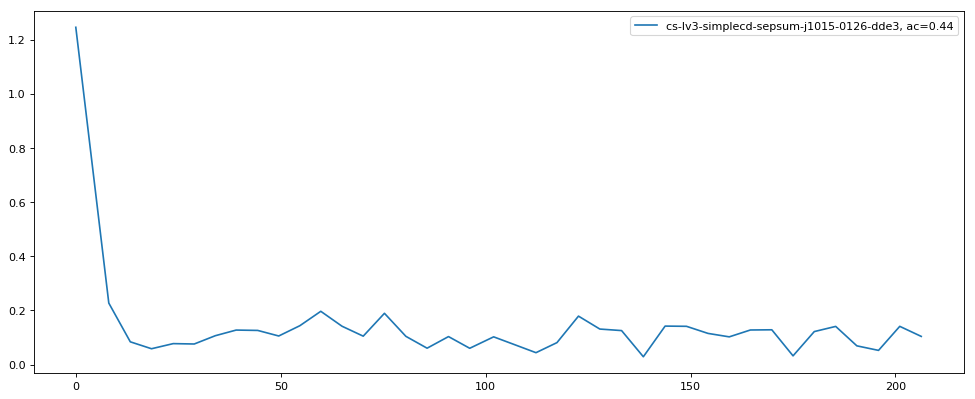

In [3]:

experiment_data = event_data_for_comparison("gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-simplecd-sepsum*")
show_experiment_loss(experiment_data)


In [ ]:

# cosine_similarity in the following should probably have the diagonal blacked out and
# explore different relative contributions via k.

tf.reduce_mean(cosine_similarity) - k*tf.reduce_mean(self_cosine_similarity)

In [6]:

args = configure_experiment("cs-lv3-kf-20-shift02",
                             problem="github_function_docstring",
                             hparams_set="similarity_transformer_tiny",
                             model="similarity_transformer_dev",
                             extra_hparams={
                                 "loss_variant": "kfnet"
                             },
                             num_gpu_per_worker=1,
                             num_steps=4000)

job = T2TExperiment(**args)
job.run()


[2018-10-15 01:49:50,356] /mnt/nfs-east1-d/work/tk
[2018-10-15 01:49:50,398] /mnt/nfs-east1-d/work/tk


train_args:
{'data_dir': '/mnt/nfs-east1-d/data',
 'dbgprofile': False,
 'hparams': "'loss_variant=kfnet'",
 'hparams_set': 'similarity_transformer_tiny',
 'log_device_placement': False,
 'model': 'similarity_transformer_dev',
 'output_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kf-20-shift02/cs-lv3-kf-20-shift02-j1015-0149-7ecf/output',
 'problem': 'github_function_docstring',
 'profile': False,
 'ps_gpu': 1,
 'save_checkpoints_secs': 1800,
 'schedule': 'train',
 'ssd_mount_path': '/mnt/disks/ssd0',
 't2t_usr_dir': 'gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kf-20-shift02/cs-lv3-kf-20-shift02-j1015-0149-7ecf/tk',
 'train_steps': 4000,
 'worker_gpu': 1,
 'worker_gpu_memory_fraction': 0.95}


[2018-10-15 01:49:57,216] smoke: True


INFO:tensorflow:Identifying event files in experiment subdirectories...


[2018-10-15 02:03:04,050] Identifying event files in experiment subdirectories...


INFO:tensorflow:Processing experiment events (1 of 1)


[2018-10-15 02:03:05,192] Processing experiment events (1 of 1)


INFO:tensorflow:Finished loading event data for comparison.


[2018-10-15 02:03:05,514] Finished loading event data for comparison.


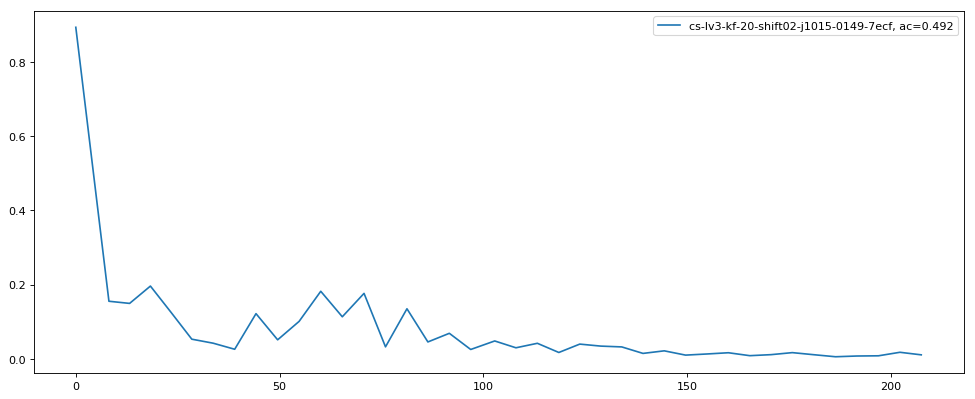

In [9]:

experiment_data = event_data_for_comparison("gs://kubeflow-rl-checkpoints/comparisons/cs-lv3-kf-*")
show_experiment_loss(experiment_data)

# kfnet, k=20, target=0.2 (i.e. shift is -20*(1-0.2))

In [ ]:
# It looks like in all of the above the x axis is off by a factor of 20.